In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import data_utils

In [26]:
df = data_utils.etl()

In [3]:
# best existing deal
current_data = df[df['ingestion_ts'] == max(df['ingestion_ts'])]
sorted_data = current_data.sort_values(by="score", ascending=False)
sorted_data[(sorted_data['price'] > 100) * (sorted_data['price'] < 200)].head(10)

,price,score,deal,num_tickets,section,title,game_ts,ingestion_ts,row
1,159,9.9,Amazing Deal,2,110,Dallas Mavericks at Philadelphia 76ers,2023-03-29T23:30:00,2023-02-02-23-32-38-972597,15
0,187,9.9,Amazing Deal,12,Luxury Suite 47,Miami Heat at Philadelphia 76ers,2023-02-28T00:00:00,2023-02-02-23-32-38-972597,NA
1,187,9.9,Amazing Deal,1-3,Luxury Suite 47,Miami Heat at Philadelphia 76ers,2023-02-28T00:00:00,2023-02-02-23-32-38-972597,NA
0,139,9.9,Amazing Deal,1-3,111,Miami Heat at Philadelphia 76ers,2023-04-06T23:30:00,2023-02-02-23-32-38-972597,13
3,150,9.9,Amazing Deal,1-3,111,Miami Heat at Philadelphia 76ers,2023-04-06T23:30:00,2023-02-02-23-32-38-972597,13
1,148,9.9,Amazing Deal,5,111,Miami Heat at Philadelphia 76ers,2023-04-06T23:30:00,2023-02-02-23-32-38-972597,12
1,106,9.8,Amazing Deal,2,104,Cleveland Cavaliers at Philadelphia 76ers,2023-02-16T00:00:00,2023-02-02-23-32-38-972597,10
9,110,9.8,Amazing Deal,2,Club Box 11,Houston Rockets at Philadelphia 76ers,2023-02-14T00:00:00,2023-02-02-23-32-38-972597,2
3,154,9.8,Amazing Deal,1,108,Dallas Mavericks at Philadelphia 76ers,2023-03-29T23:30:00,2023-02-02-23-32-38-972597,7
7,193,9.8,Amazing Deal,6,111,Miami Heat at Philadelphia 76ers,2023-04-06T23:30:00,2023-02-02-23-32-38-972597,2


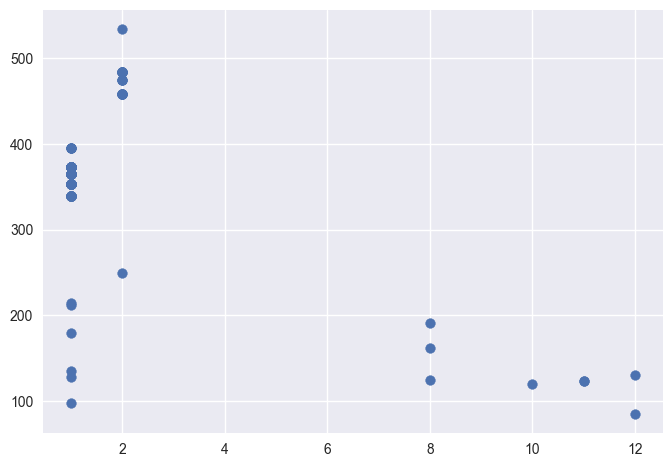

In [35]:
# using historical data to find the best hypothetical deals
sections_of_interest = ['101', '113', '114', '112', '124', '102']
row_map = {'AA': -2, 'BB': -1, 'CC': 0}
best_seats = df
best_seats = best_seats[best_seats['score'] > 9.9]
best_seats = best_seats[best_seats['section'].apply(lambda x: x in sections_of_interest)]
best_seats['row'] = best_seats['row'].apply(lambda x: row_map[x] if x in row_map else x)


plt.scatter(best_seats['row'].astype('int'), best_seats['price'])
plt.show()

## Notification Rule:
    row in ['101', '113', '114', '112', '124', '102'] and score == 10.0 and price < 200